In [1]:
import pysentiment2 as ps
import pandas as pd 
import numpy as np 
import glob, os
import sys 
# utils_path = os.path.expanduser("~/Documents/Documents - KBO’s MacBook Pro/Utils/")
# sys.path.insert(0, utils_path)
# root = '/Users/rayboppana/Documents/Documents - KBO’s MacBook Pro/MSCF/Mini_5/NLP/HW1/the_tens/'
root = '/Volumes/TOSHIBA2TB/nlp/the_tens/'

import nltk
from nltk import word_tokenize
from nltk import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('omw-1.4')    
nltk.download('wordnet')
nltk.download('stopwords')

from tqdm import tqdm 
from collections import Counter 
import matplotlib.pyplot as plt 
import re
# os.chdir('/Users/rayboppana/Documents/Documents - KBO’s MacBook Pro/MSCF/Mini_5/NLP/HW1/')
os.chdir('/Users/eileen_lxr/Desktop/MSCF/Courses/202209 Mini V/46924 NLP/Assignment 1/')

import seaborn as sns

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/eileen_lxr/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/eileen_lxr/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/eileen_lxr/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/eileen_lxr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# mkt_returns.rolling(4).sum().shift(-3)

In [3]:
mkt_returns = pd.read_csv('Data/mkt_returns.csv')
mkt_returns['caldt'] = pd.to_datetime(mkt_returns['caldt'], format='%Y%m%d')
mkt_returns.set_index('caldt', inplace=True)
mkt_returns = mkt_returns.rolling(4).sum().shift(-3)
mkt_returns

,vwretd
caldt,
2011-01-03,0.013465
2011-01-04,0.000385
2011-01-05,0.000145
2011-01-06,-0.001190
2011-01-07,0.009557
...,...
2021-12-27,0.010991
2021-12-28,-0.005258
2021-12-29,NaN


In [4]:
filename = 'Data/stock_daily_gvkey.csv'
date_col = 'datadate'
id_col = 'GVKEY'
price_col = 'prccd'

stock_data = pd.read_csv(filename, low_memory=False)
stock_data[date_col] = pd.to_datetime(stock_data[date_col], format='%Y%m%d')
stock_data = stock_data.drop_duplicates(subset=[id_col,date_col])
stock_data.set_index([id_col, date_col], inplace=True)
stock_data = stock_data[price_col]
price_data = stock_data.unstack(level=0)
price_data

GVKEY,1045,1075,1078,1161,1177,1209,1230,1279,1300,1327,...,187450,187697,188255,189491,198058,199356,260774,260778,294524,316056
datadate,,,,,,,,,,,,,,,,,,,,,
2010-01-04,7.72,36.88,54.46,9.70,33.00,83.16,34.87,23.52,40.35,14.82,...,NaN,NaN,NaN,NaN,NaN,NaN,13.82,37.15,NaN,NaN
2010-01-05,8.36,36.38,54.02,9.71,32.53,82.47,36.78,23.13,40.43,15.05,...,NaN,NaN,NaN,NaN,NaN,NaN,14.15,37.10,NaN,NaN
2010-01-06,8.11,36.76,54.32,9.57,32.40,81.79,36.45,23.66,40.43,14.91,...,NaN,NaN,NaN,NaN,NaN,NaN,14.03,36.67,NaN,NaN
2010-01-07,8.25,36.69,54.77,9.47,33.43,81.32,36.26,23.21,41.21,14.74,...,NaN,NaN,NaN,NaN,NaN,NaN,14.17,37.18,NaN,NaN
2010-01-08,8.11,36.92,55.05,9.43,32.70,81.84,35.54,22.99,42.12,15.00,...,NaN,NaN,NaN,NaN,NaN,NaN,14.20,36.40,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,18.17,68.89,141.46,154.36,NaN,302.22,52.62,NaN,206.43,155.36,...,188.69,697.00,104.76,118.29,63.36,27.24,107.79,NaN,91.67,129.58
2021-12-28,18.54,69.72,140.47,153.15,NaN,303.99,52.90,NaN,207.05,155.94,...,186.79,682.20,105.91,119.52,63.04,27.37,107.72,NaN,92.72,131.06
2021-12-29,18.05,69.87,141.19,148.26,NaN,305.40,52.14,NaN,207.53,156.37,...,185.47,677.84,106.63,119.36,64.01,27.21,108.58,NaN,92.67,132.37


In [5]:
log_return = np.log(price_data/price_data.shift(1))
log_return

GVKEY,1045,1075,1078,1161,1177,1209,1230,1279,1300,1327,...,187450,187697,188255,189491,198058,199356,260774,260778,294524,316056
datadate,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.079644,-0.013650,-0.008112,0.001030,-0.014345,-0.008332,0.053327,-0.016721,0.001981,0.015400,...,NaN,NaN,NaN,NaN,NaN,NaN,0.023598,-0.001347,NaN,NaN
2010-01-06,-0.030361,0.010391,0.005538,-0.014523,-0.004004,-0.008280,-0.009013,0.022655,0.000000,-0.009346,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.008517,-0.011658,NaN,NaN
2010-01-07,0.017115,-0.001906,0.008250,-0.010504,0.031295,-0.005763,-0.005226,-0.019203,0.019109,-0.011467,...,NaN,NaN,NaN,NaN,NaN,NaN,0.009929,0.013812,NaN,NaN
2010-01-08,-0.017115,0.006249,0.005099,-0.004233,-0.022079,0.006374,-0.020056,-0.009524,0.021842,0.017485,...,NaN,NaN,NaN,NaN,NaN,NaN,0.002115,-0.021202,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,-0.004941,-0.000290,0.016393,0.054722,NaN,0.009108,-0.007573,NaN,0.005879,0.012566,...,0.002760,0.049890,0.019373,0.006701,0.026711,-0.000734,0.018445,NaN,0.012293,0.017909
2021-12-28,0.020159,0.011976,-0.007023,-0.007870,NaN,0.005840,0.005307,NaN,0.002999,0.003726,...,-0.010120,-0.021463,0.010918,0.010344,-0.005063,0.004761,-0.000650,NaN,0.011389,0.011357
2021-12-29,-0.026785,0.002149,0.005113,-0.032450,NaN,0.004628,-0.014471,NaN,0.002316,0.002754,...,-0.007092,-0.006412,0.006775,-0.001340,0.015270,-0.005863,0.007952,NaN,-0.000539,0.009946


In [6]:
# excess_returns = price_data.shift(-4)/price_data-1
excess_returns = log_return.rolling(4).sum().shift(-1)
excess_returns.loc[mkt_returns.index] -= np.array(mkt_returns)
excess_returns

GVKEY,1045,1075,1078,1161,1177,1209,1230,1279,1300,1327,...,187450,187697,188255,189491,198058,199356,260774,260778,294524,316056
datadate,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.049284,0.001084,0.010775,-0.028230,-0.009132,-0.016000,0.019032,-0.022792,0.042931,0.012073,...,NaN,NaN,NaN,NaN,NaN,NaN,0.027125,-0.020395,NaN,NaN
2010-01-06,-0.037786,0.030855,0.023961,-0.060496,0.006435,0.010494,-0.040505,-0.003899,0.053455,-0.002661,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.006381,-0.040990,NaN,NaN
2010-01-07,-0.037693,0.018596,0.015527,-0.101074,-0.056832,0.005973,-0.009372,-0.030468,0.042137,-0.013505,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.032600,-0.048613,NaN,NaN
2010-01-08,-0.019584,0.025829,0.009449,-0.034375,-0.083564,0.021653,0.029350,-0.011265,0.026579,0.020813,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.015648,-0.039780,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,-0.021451,0.011820,0.002145,-0.017788,NaN,0.003627,-0.031571,NaN,-0.001824,0.004403,...,-0.020388,0.004067,0.018072,0.002534,0.032932,0.001404,0.014112,NaN,0.006850,0.022083
2021-12-28,-0.006367,0.029635,0.000155,-0.064911,NaN,0.011985,-0.004673,NaN,0.015284,0.003841,...,-0.025689,-0.036566,0.025480,0.018944,0.029427,0.005992,0.011915,NaN,0.011348,0.027089
2021-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
ignore = ['.DS_Store', '.ipynb_checkpoints']
# os.chdir('/Users/rayboppana/Documents/Documents - KBO’s MacBook Pro/MSCF/Mini_5/NLP/HW1/')
# folders = os.listdir()

# Harvard and Loughron/McDonald Dictionaries
hiv4 = ps.HIV4()
lm = ps.LM()

dicts = [hiv4,lm]
def get_text_score(text, dictionary):
    tokens = dictionary.tokenize(text)
    return dictionary.get_score(tokens)

# text preprocessing
def lemmatize_words(words):
    lemmatized_words = [WordNetLemmatizer().lemmatize(word, 'v') for word in words]
    return lemmatized_words
    
def preprocess_text(text):
    # 1. switch to lower case
    clean_text = text.lower()

    # 2. lemmatize the data
    word_pattern = re.compile('\w+')
    text_lemma = lemmatize_words(word_pattern.findall(clean_text))
    
    # 3. remove the stop words
    lemma_english_stopwords = lemmatize_words(stopwords.words('english'))
    text_lemma = [word for word in text_lemma if word not in lemma_english_stopwords]
    
    # preprocessed text
    lemma_doc =  ' '.join(text_lemma)
    
    return lemma_doc


In [8]:
# Get all folders 
subfolders = [x[0] for x in os.walk(root)][1:]
gvkey_txt_dict = dict() # key = gvkey, value = name of txt

N = 0
gvk_txt = []
for folder in subfolders:
    os.chdir(folder)
    txt_names=[]
    for file in glob.glob("*.txt"):
        txt_names.append(folder.split('/')[-1] + '/'+ file)
        N+=1
    gvk_txt.extend(txt_names)

In [9]:
## compute M, alpha vector, and excess returns vector in first pass 
all_tokens = []
alpha = np.zeros(N)
excess_returns_vec = np.zeros(N)
alpha_index = 0
print("Computing M, alpha, and excess returns")
texts = []
for file in tqdm(gvk_txt):
    with open(root + file,'r') as f:
        text = f.read()
        text = preprocess_text(text)
        texts.append(text)
        
    tokens = word_tokenize(text)
    alpha[alpha_index] = len(tokens)/len(set(tokens))

    all_tokens.extend(tokens)

    date = file[file.index('/')+1: file.index('.')]
    gvkey = int(file[:file.index('/')])
    if date in excess_returns.index and gvkey in excess_returns.columns:
        excess_returns_vec[alpha_index] = excess_returns.loc[date, gvkey]
    else:
        excess_returns_vec[alpha_index] = np.nan

    alpha_index += 1

unique_words = list(set(all_tokens))
M = len(unique_words)
word_index = dict(zip(unique_words, np.arange(M)))

Computing M, alpha, and excess returns


100%|███████████████████████████████████| 19732/19732 [1:02:09<00:00,  5.29it/s]


In [10]:
# compute TF and df in second pass 
tf = np.zeros((M,N))
df = np.zeros(M)
j = 0
print("Computing TF and df")
for text in tqdm(texts):
    tokens = word_tokenize(text)
    count_dict = Counter(tokens)
    for word in count_dict:
        i = word_index[word]
        tf[i,j] = count_dict[word]
        df[i] += 1
    j += 1

Computing TF and df


100%|█████████████████████████████████████| 19732/19732 [17:13<00:00, 19.09it/s]


In [11]:
# compute W matrix 
W = (1 + np.log(tf))*(np.log(N/df).reshape(-1,1) @ (1/(1+np.log(alpha)).reshape(1,-1)))
W[W==np.NINF] = 0

/var/folders/rp/f4vk_bfn6471cmm92v_bb__40000gn/T/ipykernel_1210/2127136963.py:2: RuntimeWarning: divide by zero encountered in log
  W = (1 + np.log(tf))*(np.log(N/df).reshape(-1,1) @ (1/(1+np.log(alpha)).reshape(1,-1)))


In [12]:
# Add two negativity_flag row vector from hiv and fin_neg
neg_hiv4= np.zeros((1,M))
neg_lm = np.zeros((1,M))

for i in range(len(unique_words)):
    neg_hiv4[0,i] = get_text_score(unique_words[i],hiv4)['Negative']
    neg_lm[0,i] =  get_text_score(unique_words[i],lm)['Negative']

# negative proportion for each document
neg_prop_hiv = neg_hiv4 @ W / W.sum()
neg_prop_finneg = neg_lm @ W/ W.sum()

#negative proportion for each document - simple proportion 
neg_prop_hiv_sim = neg_hiv4 @ tf / tf.sum()
neg_prop_finneg_sim = neg_lm @ tf / tf.sum()

In [13]:
results = pd.DataFrame({"Harvard Negative Proportion": neg_prop_hiv.reshape(-1),
                        "Fin Neg Negative Proportion": neg_prop_finneg.reshape(-1),
                        "Excess Returns": excess_returns_vec})


results

,Harvard Negative Proportion,Fin Neg Negative Proportion,Excess Returns
0,1.886333e-06,1.687638e-06,NaN
1,1.897354e-06,1.733981e-06,-0.003903
2,5.495509e-06,5.564874e-06,0.001146
3,1.667848e-06,1.440554e-06,0.013319
4,1.939066e-06,1.699144e-06,-0.000477
...,...,...,...
19727,1.609811e-06,1.660639e-06,0.017333
19728,7.986245e-07,7.620387e-07,0.001662
19729,2.015280e-06,1.916198e-06,-0.018465
19730,1.592047e-06,1.517064e-06,0.031766


In [14]:
results_sim = pd.DataFrame({"Harvard Negative Proportion": neg_prop_hiv_sim.reshape(-1),
                        "Fin Neg Negative Proportion": neg_prop_finneg_sim.reshape(-1),
                        "Excess Returns": excess_returns_vec})


results_sim

,Harvard Negative Proportion,Fin Neg Negative Proportion,Excess Returns
0,1.495893e-06,9.059241e-07,NaN
1,1.353294e-06,8.360225e-07,-0.003903
2,5.273373e-06,3.128793e-06,0.001146
3,1.627308e-06,9.059241e-07,0.013319
4,1.635696e-06,9.254965e-07,-0.000477
...,...,...,...
19727,1.420400e-06,5.620085e-07,0.017333
19728,7.437525e-07,2.125007e-07,0.001662
19729,1.974020e-06,7.493446e-07,-0.018465
19730,1.627308e-06,5.871730e-07,0.031766


In [15]:
def final_result(results):
    # results_copy = results.copy()
    results = results.dropna()
    results['Harvard Quintile'] = pd.qcut(results['Harvard Negative Proportion'],5)
    results['Fin Neg Quintile'] = pd.qcut(results['Fin Neg Negative Proportion'],5)

    harvard_agg_excess_ret = results.groupby(by='Harvard Quintile').median()['Excess Returns']
    harvard_agg_excess_ret.index = [1,2,3,4,5]

    Fin_Neg_excess_ret = results.groupby(by='Fin Neg Quintile').median()['Excess Returns']
    Fin_Neg_excess_ret.index = [1,2,3,4,5]

    final_results = pd.concat([harvard_agg_excess_ret, Fin_Neg_excess_ret], axis=1)
    final_results.columns=['H4N-Inf', 'Fin-Neg']
    return final_results

final_tfidf =final_result(results)
final_tf = final_result(results_sim)

/var/folders/rp/f4vk_bfn6471cmm92v_bb__40000gn/T/ipykernel_1210/1407918487.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['Harvard Quintile'] = pd.qcut(results['Harvard Negative Proportion'],5)
/var/folders/rp/f4vk_bfn6471cmm92v_bb__40000gn/T/ipykernel_1210/1407918487.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['Fin Neg Quintile'] = pd.qcut(results['Fin Neg Negative Proportion'],5)
/var/folders/rp/f4vk_bfn6471cmm92v_bb__40000gn/T/ipykernel_1210/1407918487.py:4: SettingWithCopyWa

In [16]:
os.chdir('/Users/eileen_lxr/Desktop/MSCF/Courses/202209 Mini V/46924 NLP/Assignment 1/')
final_tfidf.to_csv('final_tfidf_update return_corrected.csv')
final_tf.to_csv('final_tf_update return_corrected.csv')

In [17]:
# os.chdir('/Users/eileen_lxr/Desktop/MSCF/Courses/202209 Mini V/46924 NLP/Assignment 1/')
# final_tfidf = pd.read_csv('final_tfidf.csv',index_col = 0)
# final_tf = pd.read_csv('final_tf.csv')

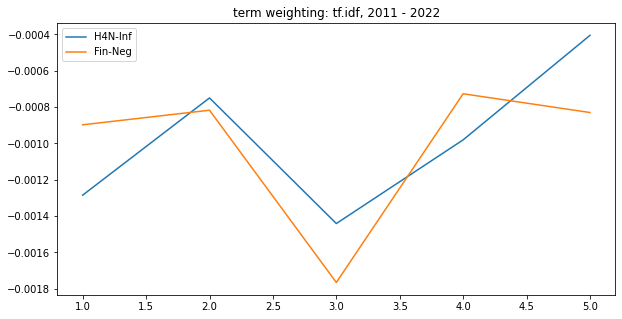

In [18]:
fig,ax = plt.subplots(figsize = (10,5))
plt.plot(final_tfidf.index,final_tfidf['H4N-Inf'].values, label ='H4N-Inf')
plt.plot(final_tfidf.index,final_tfidf['Fin-Neg'].values, label ='Fin-Neg')
plt.title('term weighting: tf.idf, 2011 - 2022')
plt.legend()
plt.savefig('term weighting: tf.idf, 2011 - 2022,update return corrected.jpg')
plt.show()

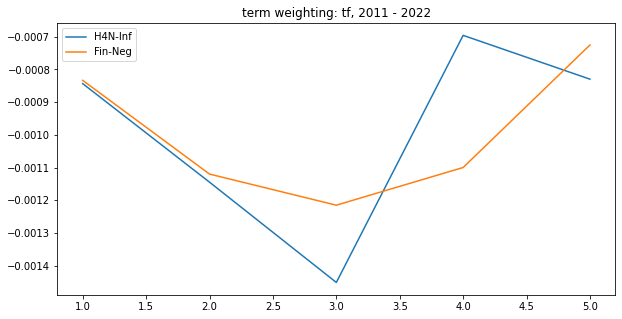

In [19]:
fig,ax = plt.subplots(figsize = (10,5))
plt.plot(final_tf.index,final_tf['H4N-Inf'].values, label ='H4N-Inf')
plt.plot(final_tf.index,final_tf['Fin-Neg'].values, label ='Fin-Neg')
plt.title('term weighting: tf, 2011 - 2022')
plt.legend()
plt.savefig('term weighting: tf, 2011 - 2022,update return corrected.jpg')
plt.show()

In [ ]:
np.save('test3.npy', a)    # .npy extension is added if not given
d = np.load('test3.npy')

In [20]:
# mkt_returns = pd.read_csv('Data/mkt_returns.csv')
# mkt_returns['caldt'] = pd.to_datetime(mkt_returns['caldt'], format='%Y%m%d')
# mkt_returns.set_index('caldt', inplace=True)
# mkt_returns = mkt_returns.rolling(3).sum().shift(-2)
# mkt_returns

In [21]:
# # excess_returns = price_data.shift(-4)/price_data-1
# excess_returns = log_return.rolling(3).sum().shift(-1)
# excess_returns.loc[mkt_returns.index] -= np.array(mkt_returns)
# excess_returns